# CartPole Gym environment with TfAgents

## Install packages (gym, tfagents, tensorflow,....)

In [1]:
#!pip install easyagents >/dev/null

In [2]:
!pip install -i https://test.pypi.org/simple/ easyagents > /dev/null

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Dry Run (very short training, no logging)

In [3]:
from easyagents.tfagents import PpoAgent
from easyagents.config import TrainingDurationFast
from easyagents.config import LoggingSilent
from easyagents.config import LoggingVerbose

ppoAgent = PpoAgent( gym_env_name='CartPole-v0', training_duration=TrainingDurationFast(), logging=LoggingSilent())
ppoAgent.train()

W0701 23:45:57.729353 15992 deprecation.py:323] From c:\dev\github\easyagents\env\lib\site-packages\tensorflow\python\ops\math_grad.py:1221: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Visualize Training (average returns, losses)

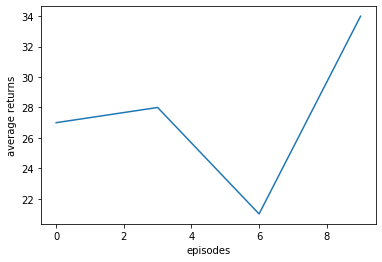

In [4]:
ppoAgent.plot_average_returns()

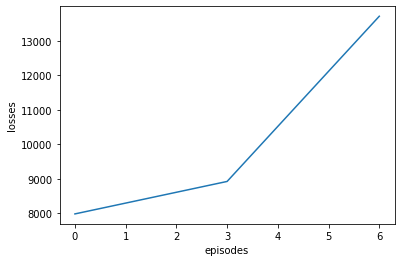

In [5]:
ppoAgent.plot_losses()

### Visualize Trained Policy (playing a game)

In [6]:
import IPython

IPython.display.HTML( ppoAgent.render_episodes_to_html() )

W0701 23:46:03.685543 15992 ffmpeg.py:839] IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (400, 600) to (400, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to None (risking incompatibility). You may also see a FFMPEG warning concerning speedloss due to data not being aligned.


## Short training (with chosen policy network layers, training durations & default logging)

In [7]:
from easyagents.tfagents import PpoAgent
from easyagents.config import TrainingDuration

In [8]:
training_duration=TrainingDuration( num_iterations = 50,
                                    num_episodes_per_iteration = 10,
                                    num_epochs_per_iteration = 5,
                                    num_iterations_between_eval = 10,
                                    num_eval_episodes = 10 )

In [ ]:
ppoAgent = PpoAgent(    gym_env_name = 'CartPole-v0',
                        fc_layers=(100,), 
                        training_duration=training_duration )
ppoAgent.train()

I0701 23:46:13.557380 15992 agents.py:68] gym_env_name=CartPole-v0 fc_layers=(100,)
I0701 23:46:13.558380 15992 agents.py:83] executing: tf.compat.v1.enable_v2_behavior()
I0701 23:46:13.559384 15992 agents.py:83] executing: tf.enable_eager_execution()
I0701 23:46:13.560385 15992 agents.py:83] executing: tf.compat.v1.set_random_seed(0)
I0701 23:46:13.570381 15992 agents.py:83] Creating environment:
I0701 23:46:13.572381 15992 agents.py:83]    executing tf_py_environment.TFPyEnvironment( suite_gym.load )
I0701 23:46:13.579384 15992 agents.py:83] Creating agent:
I0701 23:46:13.580386 15992 agents.py:83]   creating  tf.compat.v1.train.AdamOptimizer( ... )
I0701 23:46:13.588383 15992 agents.py:83]   creating  PPOAgent( ... )
I0701 23:46:13.603389 15992 agents.py:83]   executing tf_agent.initialize()
I0701 23:46:13.605382 15992 agents.py:83] Creating data collection:
I0701 23:46:13.606385 15992 agents.py:83]   creating TFUniformReplayBuffer()
I0701 23:46:13.633386 15992 agents.py:83]   creat

I0701 23:46:30.542954 15992 agents.py:83] training 4 of 50: executing collect_driver.run()
I0701 23:46:30.544954  3656 easyenv.py:86] #2  33.0   [totalReward=   0.0] executing reset(...)
I0701 23:46:30.568957 18348 easyenv.py:86] #2  34.33  [totalReward=  33.0] game over
I0701 23:46:30.587959  3656 easyenv.py:86] #2  35.20  [totalReward=  20.0] game over
I0701 23:46:30.605954 21124 easyenv.py:86] #2  36.17  [totalReward=  17.0] game over
I0701 23:46:30.621958 10788 easyenv.py:86] #2  37.12  [totalReward=  12.0] game over
I0701 23:46:30.643960  9956 easyenv.py:86] #2  38.21  [totalReward=  21.0] game over
I0701 23:46:30.693954 20364 easyenv.py:86] #2  39.74  [totalReward=  74.0] game over
I0701 23:46:30.708954  9956 easyenv.py:86] #2  40.17  [totalReward=  17.0] game over
I0701 23:46:30.723953 21124 easyenv.py:86] #2  41.13  [totalReward=  13.0] game over
I0701 23:46:30.739996 10788 easyenv.py:86] #2  42.15  [totalReward=  15.0] game over
I0701 23:46:30.758960  9956 easyenv.py:86] #2  4

I0701 23:46:37.285008 15992 agents.py:83] training 9 of 50: executing tf_agent.train(...)
I0701 23:46:38.277008 15992 agents.py:83] training 9 of 50: completed tf_agent.train(...) = 18729.029 [loss]
I0701 23:46:38.278013 15992 agents.py:83] training 9 of 50: executing replay_buffer.clear()
I0701 23:46:38.279006 15992 agents.py:83] training 10 of 50: executing collect_driver.run()
I0701 23:46:38.281008  3656 easyenv.py:86] #2  99.0   [totalReward=   0.0] executing reset(...)
I0701 23:46:38.324007  3656 easyenv.py:86] #2 100.75  [totalReward=  75.0] game over
I0701 23:46:38.361009  3656 easyenv.py:86] #2 101.63  [totalReward=  63.0] game over
I0701 23:46:38.392010 21124 easyenv.py:86] #2 102.44  [totalReward=  44.0] game over
I0701 23:46:38.406008  9292 easyenv.py:86] #2 103.12  [totalReward=  12.0] game over
I0701 23:46:38.440016  3656 easyenv.py:86] #2 104.45  [totalReward=  45.0] game over
I0701 23:46:38.459007 10788 easyenv.py:86] #2 105.24  [totalReward=  24.0] game over
I0701 23:46

I0701 23:46:49.366012 15992 agents.py:83] training 13 of 50: executing tf_agent.train(...)
I0701 23:46:50.387007 15992 agents.py:83] training 13 of 50: completed tf_agent.train(...) = 46106.266 [loss]
I0701 23:46:50.388013 15992 agents.py:83] training 13 of 50: executing replay_buffer.clear()
I0701 23:46:50.389005 15992 agents.py:83] training 14 of 50: executing collect_driver.run()
I0701 23:46:50.390016 20364 easyenv.py:86] #2 143.0   [totalReward=   0.0] executing reset(...)
I0701 23:46:50.420011 10788 easyenv.py:86] #2 144.53  [totalReward=  53.0] game over
I0701 23:46:50.451009 18348 easyenv.py:86] #2 145.51  [totalReward=  51.0] game over
I0701 23:46:50.504009 18348 easyenv.py:86] #2 146.92  [totalReward=  92.0] game over
I0701 23:46:50.537009  9292 easyenv.py:86] #2 147.44  [totalReward=  44.0] game over
I0701 23:46:50.566035  9292 easyenv.py:86] #2 148.47  [totalReward=  47.0] game over
I0701 23:46:50.617045  9956 easyenv.py:86] #2 149.95  [totalReward=  95.0] game over
I0701 23

I0701 23:46:58.298006 21124 easyenv.py:86] #2 206.97  [totalReward=  97.0] game over
I0701 23:46:58.342009 21124 easyenv.py:86] #2 207.76  [totalReward=  76.0] game over
I0701 23:46:58.428006 21124 easyenv.py:86] #2 208.171 [totalReward= 171.0] game over
I0701 23:46:58.435007 15992 agents.py:83] training 19 of 50: executing replay_buffer.gather_all()
I0701 23:46:58.438008 15992 agents.py:83] training 19 of 50: executing tf_agent.train(...)
I0701 23:46:59.493006 15992 agents.py:83] training 19 of 50: completed tf_agent.train(...) = 105491.836 [loss]
I0701 23:46:59.494041 15992 agents.py:83] training 19 of 50: executing replay_buffer.clear()
I0701 23:46:59.496010 15992 agents.py:83] training 20 of 50: executing collect_driver.run()
I0701 23:46:59.498009 21124 easyenv.py:86] #2 209.0   [totalReward=   0.0] executing reset(...)
I0701 23:46:59.553009 21124 easyenv.py:86] #2 210.109 [totalReward= 109.0] game over
I0701 23:46:59.654005 21124 easyenv.py:86] #2 211.211 [totalReward= 211.0] game

### Visualize Training (average returns, losses)

In [ ]:
ppoAgent.plot_average_returns()

In [ ]:
ppoAgent.plot_losses()

### Visualize Trained Policy (playing a game)

In [ ]:
import IPython

IPython.display.HTML( ppoAgent.render_episodes_to_html(num_episodes=20, fps=30) )